In [1]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

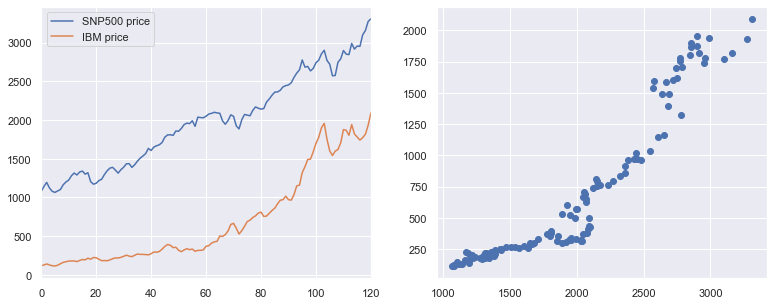

In [2]:
amzn_data = pd.read_csv('../Data/AMZN.csv',parse_dates =['Date'])
snp_data = pd.read_csv('../Data/GSPC.csv',parse_dates=['Date'])

snp_data['Price'] = (snp_data.High + snp_data.Low)*0.5
amzn_data['Price'] = (amzn_data.High + amzn_data.Low)*0.5

fig, ax = plt.subplots(1,2,figsize=(13,5))

snp_data['Price'].plot(label = 'SNP500 price',ax=ax[0])
amzn_data['Price'].plot(label = 'IBM price',ax=ax[0])

X,y = snp_data['Price'].values,amzn_data.Price.values

ax[0].legend()

plt.scatter(snp_data['Price'],amzn_data['Price']);

$ y = b_0 + b_1x $

Завдання1: Перевірка на гетероскедастичність

З переліку галузей, представлених вище, опрацьовуємо запропоновану компанію.
* (A) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних
розрахунків 𝑥 = 𝑟𝑚, 𝑦 = 𝑟𝑝 оцініть за допомогою регресії (1) параметри 𝑏0
і 𝑏1
, 𝑏2 для компанії.
* (B) Перевірити на гетероскедастичність за допомогою тесту Гольдфелда та Квондта;
* (C) Якщо підтвердиться гетероскадастичність трансформувати модель за допомогою
замін:
    * $\sigma^2_{\epsilon_i} = k^2x^2$
    * $ \sigma^2_{\epsilon_i} = k^2x$
* (D) Обрати кращу заміну і пояснити чому;

Множинна регресія:
$y = b_0+b_1x_1+b_2x_2+b_3x_3 $

Завдання 2: Перевірка на мультиколінеарність.
З переліку галузей, представлених вище, виберіть одну.
* (E) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних
розрахунків 

𝑦 = 𝑟𝑚, 𝑥1 = 𝑟𝑝; 𝑥2 = 𝑟𝑝+1; 𝑥3 = 𝑟𝑝+2,де 

𝑝 + 1 та 𝑝 + 2 компанії яка є наступними після вашої у списку.

Оцініть за допомогою МНК регресію (2) та знайдіть коефіцієнти 𝑏0, 𝑏1, 𝑏2 для компанії.
* (F) Зробіть повний характеристичний аналіз для моделі;
Модель R^2 |r |F
* (G) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);
(H) Перевірте на наявність мультиколінеарності;
(I) Якщо мультиколінеарність підтверджується змініть модель;

r=0.9463,R^2=0.8869,F=932.7917


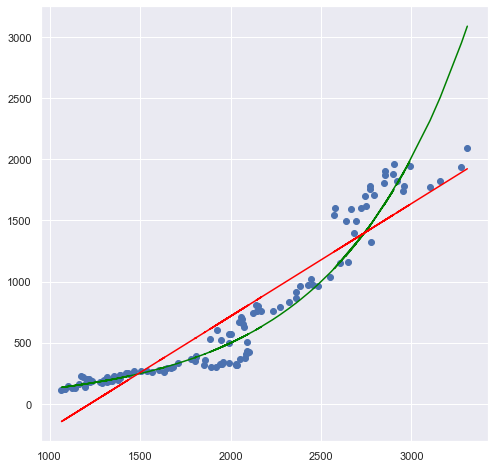

In [5]:
ols_model = OLS().fit(X,np.log(y))
ln_alpha, ln_beta = ols_model.coef_()

#y_hat = np.exp(ols_model.predict(X,y))
# y_hat = exponential_1(X,alpha,beta)
y_hat = np.exp(ln_alpha+ln_beta*X)
y_hat_usual = OLS().fit(X,y).predict(X)


plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(X,y_hat,c='green');
plt.plot(X,y_hat_usual,c='red')
r,r_sq,f_val = pearsonr(y,y_hat)[0],r2_score(y,y_hat),OLS.f_statistic(y,y_hat)
print(f'r={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')